In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
train_df=pd.read_csv("train.csv") 

In [3]:
train_df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,DRIRC89L0T,18,137576,209136,846,26,2,10.47,60,0.81,High School,Self-employed,Single,Yes,No,Business,No,0
1,TS0FIUNHNU,47,57194,5970,748,30,2,19.72,36,0.73,High School,Unemployed,Divorced,No,Yes,Education,No,0
2,I0YR284A1V,26,84328,95065,453,7,2,24.25,12,0.45,Master's,Self-employed,Married,No,No,Other,Yes,0
3,WB1T7NQV8A,53,49795,229582,533,107,3,14.44,60,0.17,Bachelor's,Self-employed,Single,Yes,No,Auto,Yes,1
4,J6GU9M4G1Z,49,115450,22072,840,0,4,24.48,12,0.11,Bachelor's,Part-time,Single,No,Yes,Education,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204272,KYS1HKNGGE,40,116623,161673,651,79,2,23.44,12,0.87,Bachelor's,Part-time,Divorced,No,No,Home,Yes,0
204273,5MAOH3AOZO,67,62958,189499,460,77,3,9.29,36,0.11,Bachelor's,Self-employed,Single,No,No,Business,Yes,0
204274,5Y9Z6NW29X,62,34372,59645,524,94,3,9.72,60,0.24,PhD,Full-time,Single,Yes,No,Auto,No,0
204275,O51974F566,44,146262,198454,489,7,4,4.31,48,0.30,High School,Self-employed,Married,Yes,No,Home,No,0


In [4]:
train_df.drop_duplicates(inplace=True)  

In [5]:
train_df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,DRIRC89L0T,18,137576,209136,846,26,2,10.47,60,0.81,High School,Self-employed,Single,Yes,No,Business,No,0
1,TS0FIUNHNU,47,57194,5970,748,30,2,19.72,36,0.73,High School,Unemployed,Divorced,No,Yes,Education,No,0
2,I0YR284A1V,26,84328,95065,453,7,2,24.25,12,0.45,Master's,Self-employed,Married,No,No,Other,Yes,0
3,WB1T7NQV8A,53,49795,229582,533,107,3,14.44,60,0.17,Bachelor's,Self-employed,Single,Yes,No,Auto,Yes,1
4,J6GU9M4G1Z,49,115450,22072,840,0,4,24.48,12,0.11,Bachelor's,Part-time,Single,No,Yes,Education,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204272,KYS1HKNGGE,40,116623,161673,651,79,2,23.44,12,0.87,Bachelor's,Part-time,Divorced,No,No,Home,Yes,0
204273,5MAOH3AOZO,67,62958,189499,460,77,3,9.29,36,0.11,Bachelor's,Self-employed,Single,No,No,Business,Yes,0
204274,5Y9Z6NW29X,62,34372,59645,524,94,3,9.72,60,0.24,PhD,Full-time,Single,Yes,No,Auto,No,0
204275,O51974F566,44,146262,198454,489,7,4,4.31,48,0.30,High School,Self-employed,Married,Yes,No,Home,No,0


In [6]:
print(train_df.isnull() .sum()) 

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


In [7]:
train_df.drop('LoanID', axis=1, inplace=True)     

In [8]:
print(len(pd.unique(train_df['Education'])))
print(len(pd.unique(train_df['EmploymentType'])))
print(len(pd.unique(train_df['MaritalStatus'])))
print(len(pd.unique(train_df['LoanPurpose'])))

4
4
3
5


In [9]:
le = LabelEncoder()
for col in ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose', 'HasMortgage', 'HasDependents', 'HasCoSigner']:
    train_df[col] = le.fit_transform(train_df[col])

In [10]:
train_df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,18,137576,209136,846,26,2,10.47,60,0.81,1,2,2,1,0,1,0,0
1,47,57194,5970,748,30,2,19.72,36,0.73,1,3,0,0,1,2,0,0
2,26,84328,95065,453,7,2,24.25,12,0.45,2,2,1,0,0,4,1,0
3,53,49795,229582,533,107,3,14.44,60,0.17,0,2,2,1,0,0,1,1
4,49,115450,22072,840,0,4,24.48,12,0.11,0,1,2,0,1,2,1,0


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

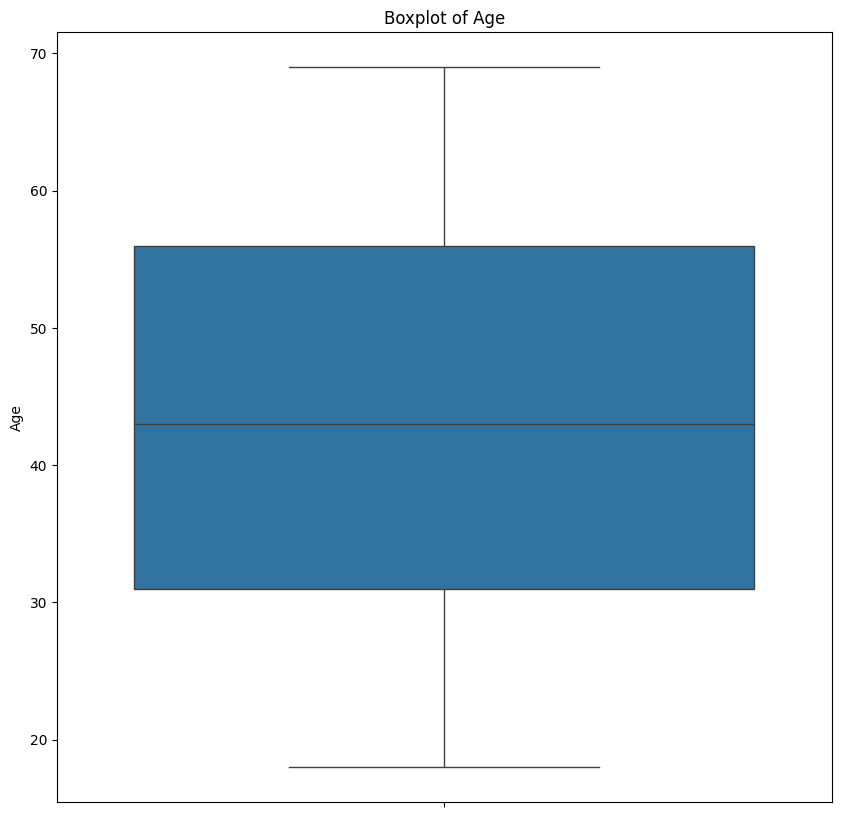

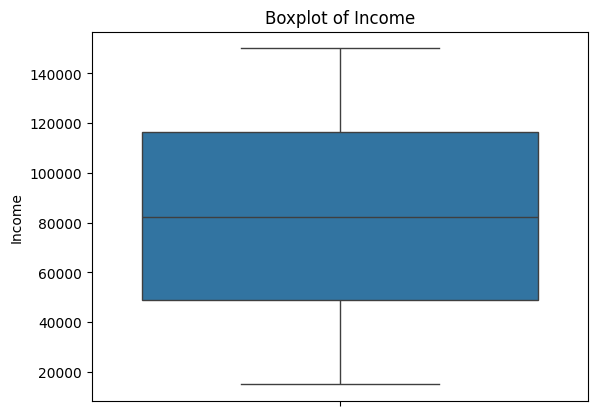

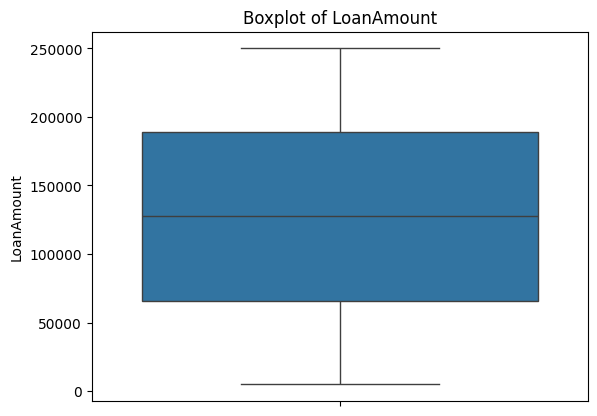

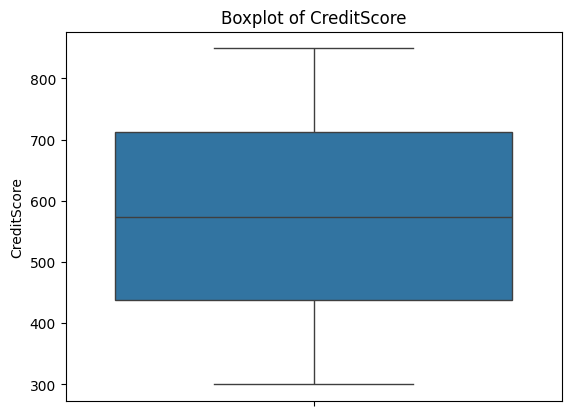

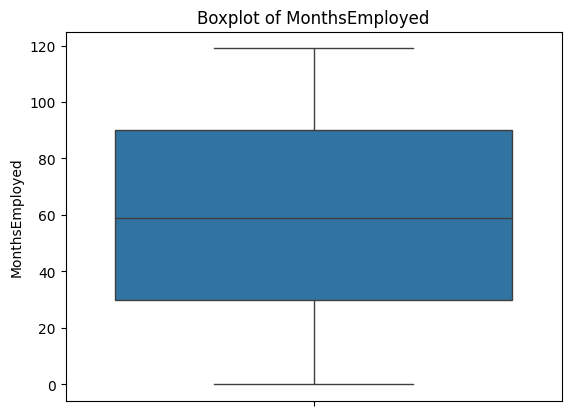

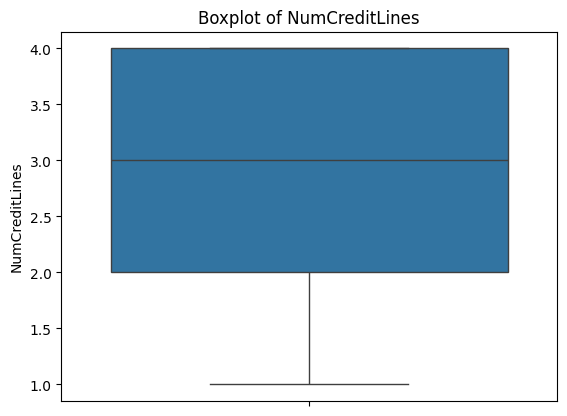

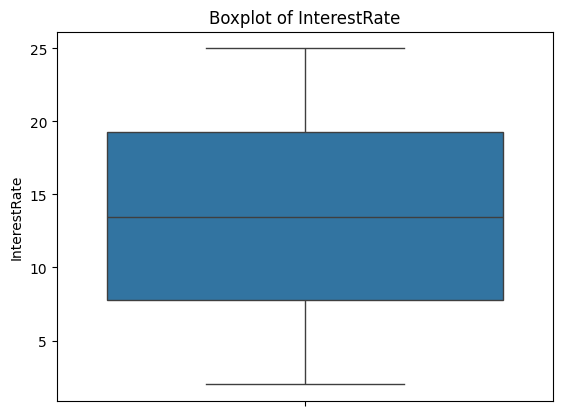

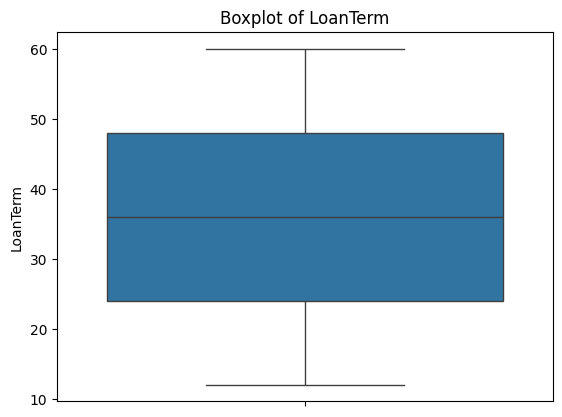

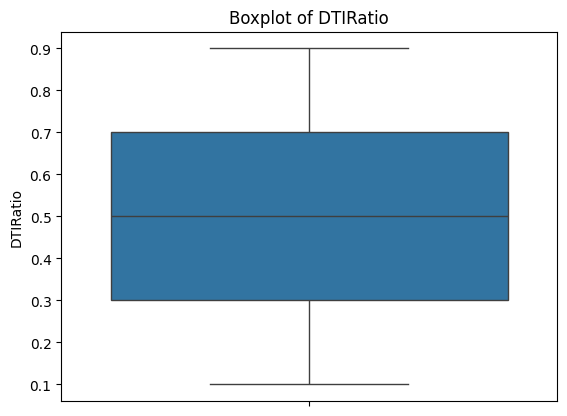

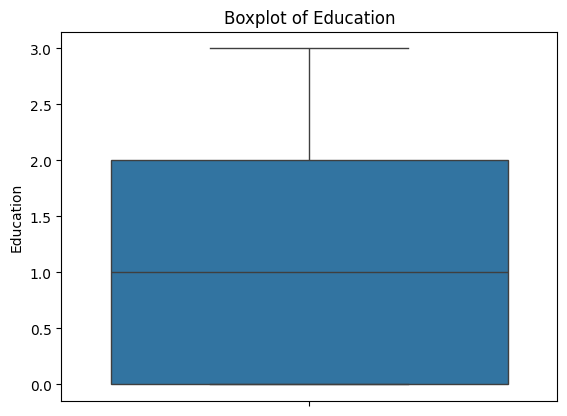

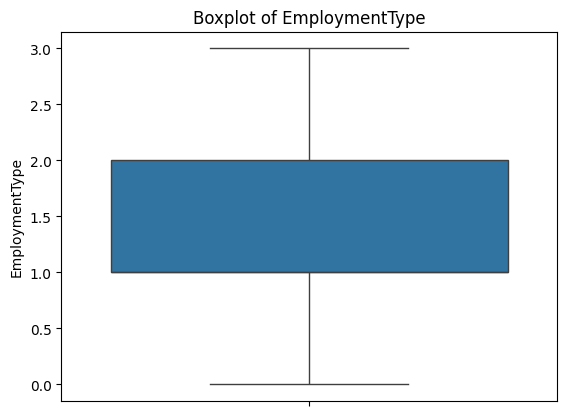

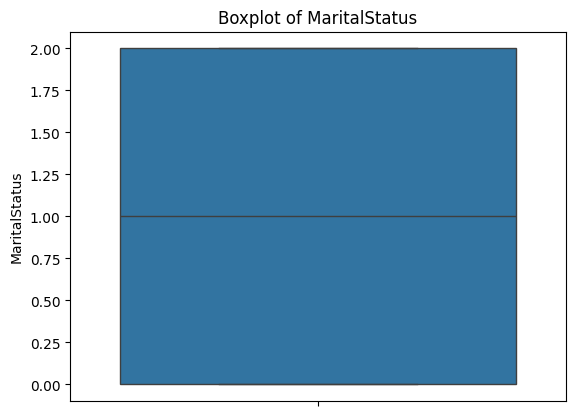

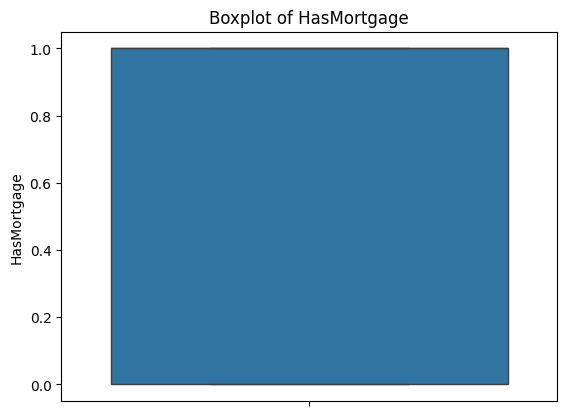

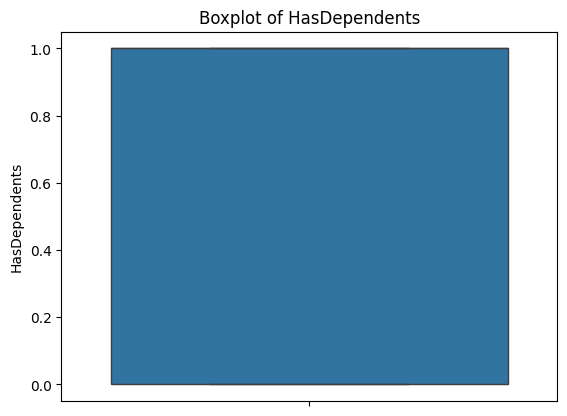

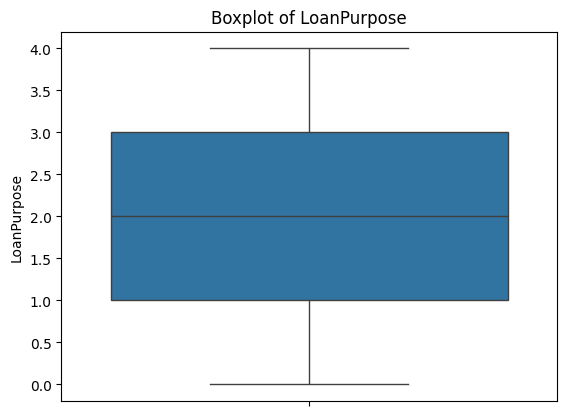

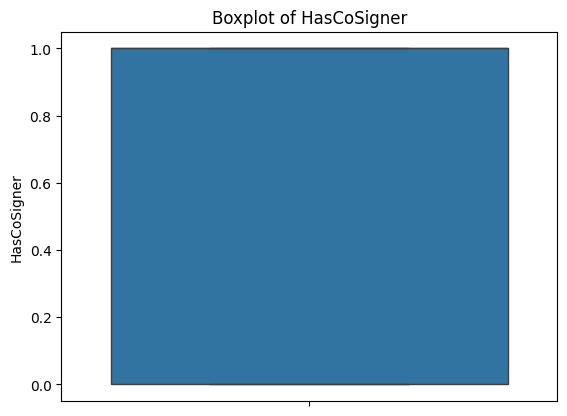

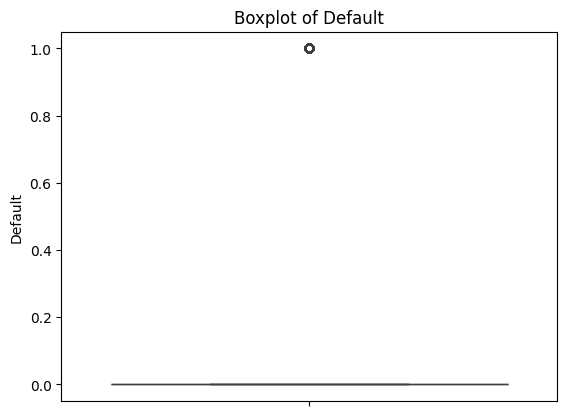

In [12]:
plt.figure(figsize=(10, 10))

for column in train_df.columns:
  if train_df[column].dtype != 'object': 
    plt.title(f'Boxplot of {column}')
    plt.show()

In [13]:
X = train_df.drop('Default', axis=1)
y = train_df['Default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(random_state=7)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_rf_classifier = grid_search.best_estimator_
accuracy = best_rf_classifier.score(X_test, y_test)
print(f"Test Accuracy of best model: {accuracy}")

Best parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best score: 0.8852044708327629
Test Accuracy of best model: 0.8881926767182299


In [16]:
test_df=pd.read_csv("test.csv") 

In [17]:
le = LabelEncoder()
for col in ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose', 'HasMortgage', 'HasDependents', 'HasCoSigner']:
    test_df[col] = le.fit_transform(test_df[col])

In [18]:
test_df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,CKV34LU7V7,55,112656,92393,581,113,2,23.54,36,0.15,3,2,2,1,1,3,0
1,62KTYNH93J,56,91569,131575,641,54,1,15.19,12,0.43,1,1,0,1,1,2,1
2,JGFUSOIUH7,26,78169,75417,569,105,3,18.02,12,0.29,2,1,1,1,1,2,1
3,4538THBHOX,26,63033,10804,326,118,1,14.71,24,0.41,1,1,2,0,0,1,1
4,DXLNA06JHR,24,29665,21182,662,102,3,15.02,60,0.69,3,3,2,0,1,1,1


In [19]:
y_train = train_df['Default']
X_train = train_df.drop('Default', axis=1)
X_test = test_df.drop('LoanID', axis=1)

In [21]:
best_params = grid_search.best_params_
final_rf = RandomForestClassifier(**best_params)
final_rf.fit(X_train, y_train)

y_pred = final_rf.predict(X_test)

submission_df = pd.DataFrame({'LoanID': test_df['LoanID'], 'Default': y_pred})
submission_df.to_csv('submission.csv', index=False)
# files.download('submission.csv')
